# Jane Street Puzzle - May 2024 - Number Cross 4

## Problem Statement

<div class="center">
<img src="images/number-cross-4-updated.png" alt="number-cross-4-updated.png", width="700" height="800">
</div>

The 11-by-11 grid above has been divided into various regions. Shade some of the cells black, then place digits (0-9) into the remaining cells. Shading must be “sparse”: that is, no two shaded cells may share an edge.

Every cell within a region must contain the same digit, and orthogonally adjacent cells in different regions must have different digits. (Note that shading cells may break up regions or change which pairs of regions are adjacent. See the example, below.)

Each row has been supplied with a clue. Every number formed by concatenating consecutive groups of unshaded cells within a row must satisfy the clue given for the row. (As in the example.) Numbers must be at least two digits long and may not begin with a 0.

The answer to this month’s puzzle is the sum of all the numbers formed in the completed grid. (As in the example.)

## Solution

For each row, we can generate all the numbers with 2 to 11 digits that satisfy the clue. Apart from the "multiple of 37" and "multiple of 88", it is possible to compute all numbers in a reasonable time and memory usage, sometimes with a small trick. 

Once we have all the potential values for each row, we can generate combinations of consecutive rows using backtracking. As many rows are not compatible this allows to quickly reduce the set of possibilities. Eventually, we use backtracking again for the remaining rows (multiple of 37 and multiple of 88).

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def generate_fibonacci_up_to_n_digits(n):
    """ Generate all Fibonacci numbers with up to n digits that do not start with zero. """
    fib = [1, 1]
    # Generate Fibonacci numbers until the number exceeds n digits
    while True:
        next_fib = fib[-1] + fib[-2]
        if len(str(next_fib)) > n:
            break
        if str(next_fib)[0] != '0':  # Skip numbers starting with zero
            fib.append(next_fib)

    # Filter to get numbers with at least two digits
    return [f for f in fib if len(str(f)) > 1]

# Max number length in the list considering blanks and digits
max_digit_length = 11  # max possible length of a number in the sequence, can be adjusted
fibonacci_numbers = generate_fibonacci_up_to_n_digits(max_digit_length)

In [3]:

def validate_sequence(sequence, index_same_num):
    for i in range(len(sequence) - 1):
        if sequence[i] != -1 and sequence[i + 1] != -1:
            if i in index_same_num and sequence[i] != sequence[i + 1]:
                return False
            elif i not in index_same_num and sequence[i] == sequence[i + 1]:
                return False
    return True

def generate_combinations(nums, current_sequence, results, index_same_num):
    if len(current_sequence) == 11:
        if validate_sequence(current_sequence, index_same_num):
            results.append(current_sequence)
        return
    if len(current_sequence) == 10:
        current_sequence.append(-1)
        if validate_sequence(current_sequence, index_same_num):
            results.append(current_sequence.copy())
        current_sequence.pop()
        current_sequence = [-1] + current_sequence
        if validate_sequence(current_sequence, index_same_num):
            results.append(current_sequence)
        return
    if len(current_sequence) == 9:
        current_sequence.append(-1)
        current_sequence = [-1] + current_sequence
        if validate_sequence(current_sequence, index_same_num):
            results.append(current_sequence)
        return
    if len(current_sequence) != 0 and current_sequence[-1] != -1:  ### second check seems useless
        current_sequence.append(-1)
    curr_seq = current_sequence.copy()
    for num in nums:
        new_seq = [int(x) for x in list(str(num))]
        if len(current_sequence) + len(new_seq) <= 11:
            current_sequence.extend(new_seq)
            generate_combinations(nums, current_sequence, results, index_same_num)
            current_sequence = curr_seq.copy()
        else:
            break
    return results

In [4]:
fibs = generate_combinations(fibonacci_numbers, [], [], {2, 4})

In [5]:
def find_numbers_with_digit_sum(target_sum, min_digits, max_digits):
    # Initialize a list to store the results
    results = []

    # Helper function to explore all combinations
    def explore(current_sum, current_number):
        # Check the current length and sum
        current_length = len(current_number)
        if current_sum == target_sum:
            if current_length >= min_digits:
                results.append(int(current_number))
            # Pad with zeros only if within digit limits
            for extra_zeros in range(1, max_digits - current_length + 1):
                padded_number = int(current_number + '0' * extra_zeros)
                if min_digits <= len(str(padded_number)) <= max_digits:
                    results.append(padded_number)
            return

        # Stop recursion if exceeding the target sum or max digits
        if current_sum > target_sum or current_length >= max_digits:
            return

        # Start next digit from 0 if some digits already added, else from 1 to prevent single zero as a number
        start = 0 if current_number else 1
        for digit in range(start, 10):
            explore(current_sum + digit, current_number + str(digit))

    # Start exploring from an empty string
    explore(0, "")
    return sorted(set(results))  # Remove duplicates and sort the result

# Finding all numbers of at least two digits and 11 digits max where the digits sum to 7
numbers_with_sum_7 = find_numbers_with_digit_sum(7, 2, 11)

In [6]:
sevens = generate_combinations(numbers_with_sum_7, [], [], {1, 3, 5, 8, 9})

In [7]:
def generate_squares(min_digits, max_digits):
    # Calculate the starting point (smallest integer with at least min_digits)
    start = int(10**(min_digits / 2))

    # Calculate the ending point (largest integer with at most max_digits)
    end = int(10**(max_digits / 2 + 0.5))  # The 0.5 ensures that we cover numbers like 316 (which squares to 99856)

    squares = []
    for i in range(start, end):
        square = i**2
        # Check if the square is still within the range of max_digits
        if len(str(square)) > max_digits:
            break
        squares.append(square)

    return squares

# Example usage
squares_list = generate_squares(2, 11)

In [8]:
squares1 = generate_combinations(squares_list, [], [], {0, 1, 3, 4, 6, 8, 9})

In [9]:
squares2 = generate_combinations(squares_list, [], [], {1, 2, 3, 4, 5, 6, 8})

In [10]:
def is_prime(n):
    """ Returns True if n is a prime number, otherwise False. """
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def sieve_of_eratosthenes(limit):
    """ Uses the Sieve of Eratosthenes to return all primes below 'limit'. """
    is_prime = [True] * (limit + 1)
    p = 2
    while p * p <= limit:
        if is_prime[p]:
            for i in range(p * p, limit + 1, p):
                is_prime[i] = False
        p += 1
    return [p for p in range(2, limit) if is_prime[p]]

def find_prime_powers(min_val, max_val):
    """ Finds all numbers within [min_val, max_val] that are prime numbers raised to prime numbers. """
    max_base = int(math.pow(max_val, 1 / 2))  # A conservative guess on the maximum base prime.
    primes = sieve_of_eratosthenes(max_base)
    result = set()

    for base in primes:
        current = base
        for exponent in primes:
            current = pow(base, exponent)
            if current > max_val:
                break
            if current >= min_val:
                result.add(current)

    return sorted(result)

# Define the range for 5 to 11 digit numbers
min_val = 10
max_val = 10**11 - 1

# Get the list of numbers that are prime powers
prime_powers = find_prime_powers(min_val, max_val)

In [11]:
primes = generate_combinations(prime_powers, [], [], {1, 3, 4, 7, 8})

In [12]:
def generate_palindromes(min_digits, max_digits):
    palindromes = []
    # Iterate over the range of digits
    for digits in range(min_digits, max_digits + 1):
        # If the number of digits is even
        if digits % 2 == 0:
            half_digits = digits // 2
            start = 10**(half_digits - 1)
            end = 10**half_digits
            for half in range(start, end):
                # Create the full palindrome by mirroring the half
                full = int(str(half) + str(half)[::-1])
                palindromes.append(full)
        # If the number of digits is odd
        else:
            half_digits = digits // 2
            start = 10**(half_digits - 1)
            end = 10**half_digits
            for half in range(start, end):
                # Middle digit can be from 0 to 9
                for mid in range(10):
                    # Create the full palindrome by mirroring the half around the middle digit
                    full = int(str(half) + str(mid) + str(half)[::-1])
                    palindromes.append(full)

    return palindromes

# Generate palindromes with 2 to 11 digits
palindromes = generate_palindromes(2, 11)

In [13]:
pal_plus_1 = generate_combinations([1 + x for x in palindromes], [], [], {1, 2, 4, 7, 8})

In [14]:
pal_minus_1 = generate_combinations([x - 1 for x in palindromes], [], [], {0, 1, 2, 3, 5, 6, 8})

In [15]:
pal_23 = generate_combinations([x for x in palindromes if x % 23 == 0], [], [], {0, 5, 7})

In [16]:
from itertools import product
from functools import reduce

digits = '1379'

product_ends_with_1 = []

# Loop through each length from 2 to 11
for length in range(2, 12):
    # Generate all combinations of the digits for the current length
    for combination in product(digits, repeat=length):
        # Join the tuple of characters to form a number and print it
        if str(reduce(lambda x, y: x*y, [int(z) for z in combination]))[-1] == '1':
            product_ends_with_1.append(int("".join(combination)))


In [17]:
prod1 = generate_combinations(product_ends_with_1, [], [], {0, 2, 3, 5, 7, 8, 9})

In [18]:
def check_multiple(a, b, index_same_num):
    for i in range(11):
        if a[i] == -1 and b[i] == -1:
            return False
        if a[i] != -1 and b[i] != -1:
            if i in index_same_num and a[i] != b[i]:
                return False
            if i not in index_same_num and a[i] == b[i]:
                return False
    return True

def get_combinations_multi(list1, list2, index_same_num):
    res, res_a, res_b = [], [], []
    unique_a = set()
    unique_b = set()
    for a in list1:
        for b in list2:
            if check_multiple(a, b, index_same_num):
                if tuple(a) not in unique_a:
                    res_a.append(a)
                    unique_a.add(tuple(a))
                if tuple(b) not in unique_b:
                    res_b.append(b)
                    unique_b.add(tuple(b))
                res.append([a, b])
    return res, res_a, res_b


In [19]:
prev_lens = 0
while prev_lens != len(squares1) + len(pal_plus_1) + len(primes) + len(sevens) + len(fibs) + len(squares2):
    prev_lens = len(squares1) + len(pal_plus_1) + len(primes) + len(sevens) + len(fibs) + len(squares2)
    comb1, squares1, pal_plus_1 = get_combinations_multi(squares1, pal_plus_1, index_same_num={0, 4, 5, 6, 8, 9})
    comb2, pal_plus_1, primes = get_combinations_multi(pal_plus_1, primes, index_same_num={0, 1, 2, 4, 5, 6, 7, 8, 9, 10})
    comb3, primes, sevens = get_combinations_multi(primes, sevens, index_same_num={0, 1, 2, 3, 4, 7, 10})
    comb4, sevens, fibs = get_combinations_multi(sevens, fibs, index_same_num={0, 1, 3, 6, 7, 8, 10})
    comb5, fibs, squares2 = get_combinations_multi(fibs, squares2, index_same_num={0, 4, 5, 7, 9})

comb8, pal_23, prod1 = get_combinations_multi(pal_23, prod1, index_same_num={0, 1, 2, 4, 5, 6, 7, 8, 10})

In [20]:
len(squares1) + len(pal_plus_1) + len(primes) + len(sevens) + len(fibs) + len(squares2)

6

In [21]:
np.array([squares1[0], pal_plus_1[0], primes[0], sevens[0], fibs[0], squares2[0]])

array([[ 1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4],
       [ 1,  3,  3,  3,  2, -1,  3,  4,  4,  4, -1],
       [ 1,  3,  3,  1, -1,  7,  3,  4,  4,  4,  9],
       [ 1,  3,  3, -1,  1,  0,  0,  4,  1,  1, -1],
       [ 1,  3, -1,  1,  4,  4, -1,  4,  1,  8,  1],
       [ 1,  4,  4,  4, -1,  4,  4,  4,  8,  8,  9]])

In [22]:
def solve(curr_seq, results, curr_num, mod, top, bottom, index_same_num_top, index_same_num_bottom):
    if len(curr_seq) == 11:
        if curr_seq[-1] == -1 or (int(curr_num) % mod == 0 and len(curr_num) > 1):
            results.append(curr_seq.copy())
        return
    for i in [-1] + [x for x in range(10)]:
        if i == -1:
            if len(curr_seq) > 0 and curr_seq[-1] == -1:
                continue
            if len(curr_num) == 1 or (len(curr_num) > 0 and int(curr_num) % mod != 0):
                continue
            if top[len(curr_seq)] == -1 or bottom[len(curr_seq)] == -1:
                continue
            solve(curr_seq + [i], results, '', mod, top, bottom, index_same_num_top, index_same_num_bottom)
        else:
            x = len(curr_seq)
            if x in index_same_num_bottom and bottom[x] not in [-1, i]:
                continue
            elif x not in index_same_num_bottom and bottom[x] == i:
                continue
            if x in index_same_num_top and top[x] not in [-1, i]:
                continue
            elif x not in index_same_num_top and top[x] == i:
                continue
            solve(curr_seq + [i], results, curr_num + str(i), mod, top, bottom, index_same_num_top, index_same_num_bottom)
    return results

In [23]:
multiple37 = []
for i in range(len(pal_23)):
    multiple37.extend(solve([], [], '', 37, top=squares2[0], bottom=pal_23[i], index_same_num_top={1, 2, 3, 4, 7, 8, 9}, index_same_num_bottom={0, 3, 5, 6, 7, 9}))
multi37 = []
for m in multiple37:
    if validate_sequence(m, {1, 2, 3, 5, 8, 9}):
        multi37.append(m)

In [24]:
multi37

[[7, 4, 4, 4, 4, -1, 7, 4, 8, 8, 8]]

In [25]:
prev_lens = 0
while prev_lens != len(multi37) + len(pal_23) + len(prod1):
    prev_lens = len(multi37) + len(pal_23) + len(prod1)
    comb6, squares2, multi37 = get_combinations_multi(squares2, multi37, index_same_num={1, 2, 3, 4, 7, 8, 9})
    comb7, multi37, pal_23 = get_combinations_multi(multi37, pal_23, index_same_num={0, 3, 5, 6, 7, 9})
    comb8, pal_23, prod1 = get_combinations_multi(pal_23, prod1, index_same_num={0, 1, 2, 4, 5, 6, 7, 8, 10})

In [26]:
multiple88 = []
for i in range(len(prod1)):
    for j in range(len(pal_minus_1)):
        multiple88.extend(solve([], [], '', 88, top=prod1[i], bottom=pal_minus_1[j], index_same_num_top={0, 2, 6, 7, 8, 9}, index_same_num_bottom={0, 3, 4, 6, 8, 9, 10}))
multi88 = []
for m in multiple88:
    if validate_sequence(m, {1, 3, 4, 7, 8}):
        multi88.append(m)

In [27]:
multi88

[[-1, 1, 1, 4, 4, -1, 7, 9, 9, 9, 2]]

In [28]:
prev_lens = 0
while prev_lens != len(prod1) + len(multi88) + len(pal_minus_1):
    prev_lens = len(prod1) + len(multi88) + len(pal_minus_1)
    comb9, prod1, multi88 = get_combinations_multi(prod1, multi88, index_same_num={0, 2, 6, 7, 8, 9})
    comb10, multi88, pal_minus_1 = get_combinations_multi(multi88, pal_minus_1, index_same_num={0, 3, 4, 6, 8, 9, 10})

In [29]:
grid = np.array([squares1[0], pal_plus_1[0], primes[0], sevens[0], fibs[0], squares2[0], multi37[0], pal_23[0], prod1[0], multi88[0], pal_minus_1[0]])

/var/folders/9n/dhbgs6q906j_2_3nrnjcznfr0000gn/T/ipykernel_46951/2338434907.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("tab20c").copy()
  cmap.set_under('black')  # Set color for -1 values


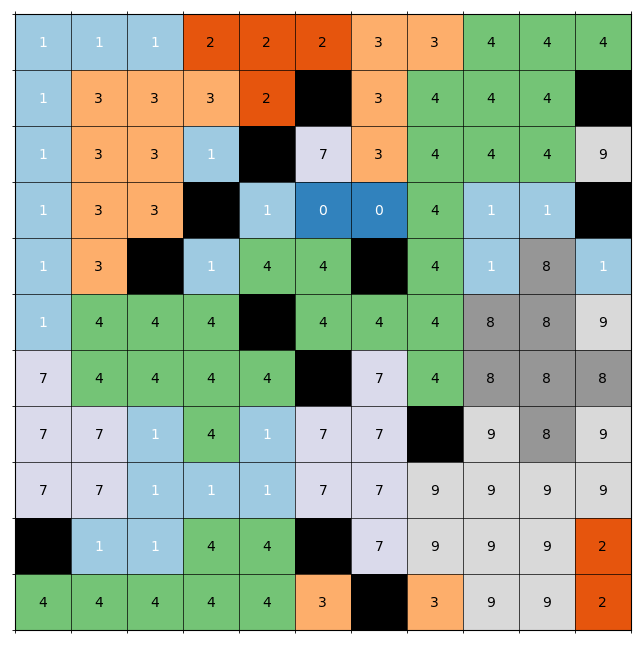

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
cmap = plt.get_cmap('tab20c')
cmap.set_under('black')  # Set color for -1 values

# Create the heatmap
cax = ax.matshow(grid, cmap=cmap, vmin=-0.1, vmax=9)

# Add text only for values != -1
for (i, j), val in np.ndenumerate(grid):
    if val != -1:
        ax.text(j, i, val, ha='center', va='center', color='white' if val < 2 else 'black')

# Grid appearance settings
ax.set_xticks(np.arange(-.5, 11, 1), minor=True)
ax.set_yticks(np.arange(-.5, 11, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)

# Remove major ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [31]:
res = 0
for i in range(len(grid)):
    curr = ''
    for j in range(len(grid[0])):
        if grid[i, j] != -1:
            curr += str(grid[i, j])
        else:
            if j != 0:
                res += int(curr)
                print(int(curr))
                curr = ''
    if curr != '':
        res += int(curr)
        print(int(curr))

11122233444
13332
3444
1331
734449
133
100411
13
144
4181
1444
444889
74444
74888
7714177
989
77111779999
1144
79992
444443
3992


In [32]:
res

88243711283